# Fumiya Hayakawa

## Fumiya’s Research Interest: Consumer behavior and price sensitivity 

**Research Question: To what extent does inflation affect the behaviour of consumers?**

My research will mainly cover the correlation between CPI (Consumer Price Index) and Walmart's weekly sales revenue to identify the between consumer spending and infaltion.

If there is a postive relationship between CPI and sales revenue, this would suggest that customers are still willing to buy goods and willing to spend more money on the goods despite higher prices.To identify the correlation, I would like to visualize the data by correlation diagram or another effective chart. Of course, other factors, such as employee rates or temperature, would affect consumer behavior, so I would like to put this information into my research to fully understand the consumer behavior.


In [ ]:
import pandas as pd

FHdf=pd.read_csv('../data/raw/Walmart.csv')
FHdf

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**Preliminary Data Processing**  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
FHdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
FHdf.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Database Cleaning**

In [ ]:
# convert the "Revised_date" colum to datetime format
FHdf["Revised_Date"]=pd.to_datetime(FHdf["Date"],format="%d-%m-%Y")
FHdf["Revised_Date"]=FHdf["Revised_Date"].dt.date
FHdf.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Revised_Date
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05


In [ ]:
# sort the dataframe by the "Revised_date" column
FHdf =FHdf.sort_values(by=["Revised_Date"])
FHdf.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Revised_Date
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
1287,10,05-02-2010,2193048.75,0,54.34,2.962,126.442065,9.765,2010-02-05
5148,37,05-02-2010,536006.73,0,45.97,2.572,209.852966,8.554,2010-02-05
2288,17,05-02-2010,789036.02,0,23.11,2.666,126.442065,6.548,2010-02-05
4147,30,05-02-2010,465108.52,0,39.05,2.572,210.752605,8.324,2010-02-05
3432,25,05-02-2010,677231.63,0,21.10,2.784,204.247194,8.187,2010-02-05
3003,22,05-02-2010,1033017.37,0,24.36,2.788,135.352461,8.283,2010-02-05
3146,23,05-02-2010,1364721.58,0,15.25,2.788,131.527903,5.892,2010-02-05
3289,24,05-02-2010,1388725.63,0,22.43,2.954,131.527903,8.326,2010-02-05
2574,19,05-02-2010,1507637.17,0,20.96,2.954,131.527903,8.350,2010-02-05


In [ ]:
# Clear my database/ Drop irrelevant information
FHdf_cleaned = FHdf.copy().drop(['Holiday_Flag','Unemployment'], axis=1)
FHdf_cleaned.head(10)                                                         

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Revised_Date
0,1,05-02-2010,1643690.90,42.31,2.572,211.096358,2010-02-05
1287,10,05-02-2010,2193048.75,54.34,2.962,126.442065,2010-02-05
5148,37,05-02-2010,536006.73,45.97,2.572,209.852966,2010-02-05
2288,17,05-02-2010,789036.02,23.11,2.666,126.442065,2010-02-05
4147,30,05-02-2010,465108.52,39.05,2.572,210.752605,2010-02-05
3432,25,05-02-2010,677231.63,21.10,2.784,204.247194,2010-02-05
3003,22,05-02-2010,1033017.37,24.36,2.788,135.352461,2010-02-05
3146,23,05-02-2010,1364721.58,15.25,2.788,131.527903,2010-02-05
3289,24,05-02-2010,1388725.63,22.43,2.954,131.527903,2010-02-05
2574,19,05-02-2010,1507637.17,20.96,2.954,131.527903,2010-02-05


**Exploratory Visualizations:**

### Graph 1 ###

Text(0.5, 1.0, 'Correlation Heatmap for Walmart Dataset')

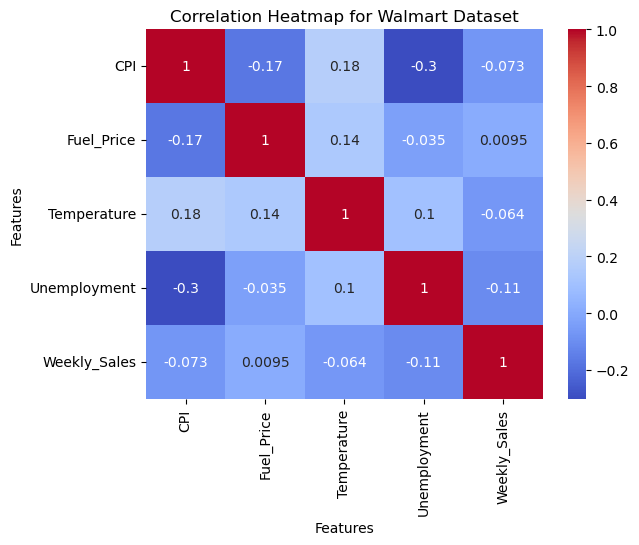

In [ ]:
FHdf=pd.read_csv('../data/raw/Walmart.csv')

cols = ["CPI","Fuel_Price","Temperature", "Unemployment", "Weekly_Sales"]
corr_matrix=FHdf[cols].corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap for Walmart Dataset')


***Observation:***
From this heatmap, we can see that the correlation between sales revenue and CPI is negative and quite low. This means that as CPI, one of the inflation indexes, increases, sales revenue would slightly decrease. To decompose sales revenue as product prices times number of customer purchase, we can also say that as prices increase due to inflation, the number of customer purchase would slightly decrease during the inflationary time.

However, according to this heatmap, temperature would be one of the critical variables that would positively affect the sales revenue. This implies that customers are influenced by temperature.


### Graph 2 ###

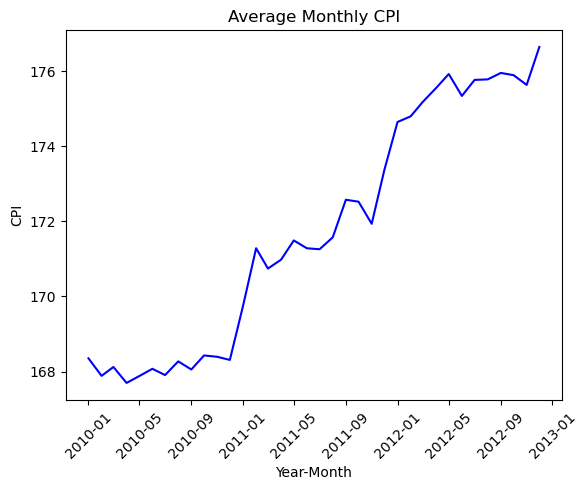

In [ ]:


FHdf_cleaned['Date'] = pd.to_datetime(FHdf_cleaned['Date'],format="%d/%m/%Y" )

FHdf_cleaned['YearMonth'] = FHdf_cleaned['Date'].dt.strftime('%Y-%m')
average_cpi = FHdf_cleaned.groupby('YearMonth')['CPI'].mean().reset_index()
average_cpi['YearMonth'] = pd.to_datetime(average_cpi['YearMonth'])

# create a figure and axis object
fig, ax = plt.subplots()

# plot the line for average monthly CPI
ax.plot(average_cpi['YearMonth'], average_cpi['CPI'], color='blue', label='Average CPI')

# set the title and axis labels
ax.set_title('Average Monthly CPI')
ax.set_xlabel('Year-Month')
ax.set_ylabel('CPI')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the plot
plt.show()



**Observation:** 
The average monthly CPI has been increasing over the three years. In particular, the monthly CPI has increased dramatically in the last quarter of 2010 and 2011.


### Graph 3 ###

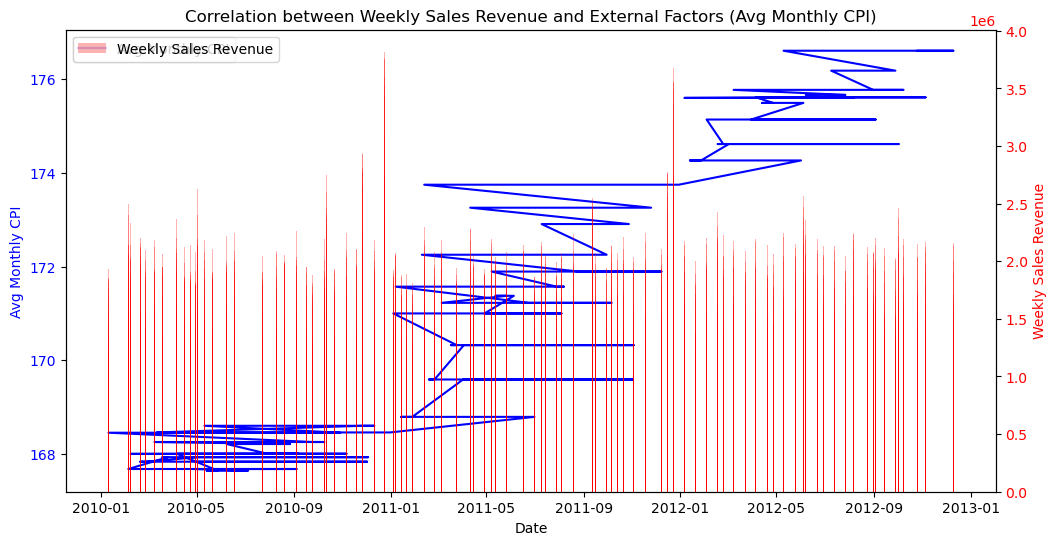

In [ ]:

# convert the "Revised_Date" column to datetime format
FHdf_cleaned['Date'] = pd.to_datetime(FHdf_cleaned['Date'])
FHdf_cleaned['Revised_Date'] = pd.to_datetime(FHdf_cleaned['Revised_Date'])
                        

# calculate the average monthly CPI and create a new column
FHdf_cleaned['Avg_Monthly_CPI'] = FHdf_cleaned.groupby(pd.Grouper(key='Revised_Date', freq='M'))['CPI'].transform('mean')

# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12,6))

# plot the line for average monthly CPI
ax1.plot(FHdf_cleaned['Date'], FHdf_cleaned['Avg_Monthly_CPI'], color='blue', label='Avg Monthly CPI')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Monthly CPI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second axis object for weekly sales revenue
ax2 = ax1.twinx()

# plot the bar chart for weekly sales revenue
ax2.bar(FHdf_cleaned['Date'], FHdf_cleaned['Weekly_Sales'], alpha=0.3, color='red', label='Weekly Sales Revenue')
ax2.set_ylabel('Weekly Sales Revenue', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# add a legend to the plot
ax1.legend(loc='upper left')
ax2.legend(loc="upper left")

# set the title
ax1.set_title('Correlation between Weekly Sales Revenue and External Factors (Avg Monthly CPI)')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the plot
plt.show()


**Observation:** Weekly sales have not changed too much, while the average monthly CPI has increased over the three years.

### Graph 4 ###

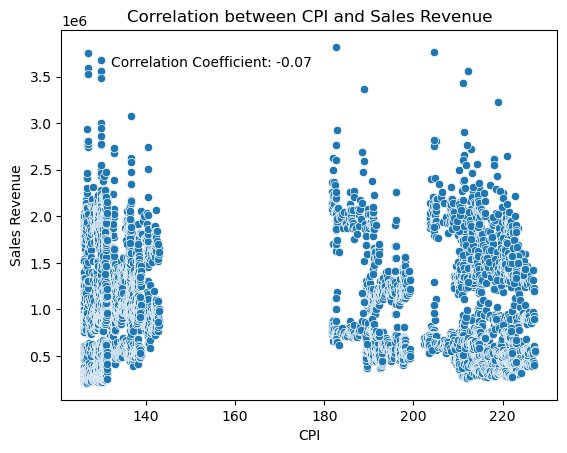

In [ ]:

# plot a scatter plot of CPI vs sales revenue
sns.scatterplot(x='CPI', y='Weekly_Sales', data=FHdf_cleaned)

# calculate the correlation coefficient between CPI and sales revenue
correlation_coefficient = FHdf_cleaned['CPI'].corr(FHdf_cleaned['Weekly_Sales'])

# add the correlation coefficient to the plot as text
plt.text(0.1, 0.9, f'Correlation Coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)

# set the x-axis and y-axis labels
plt.xlabel('CPI')
plt.ylabel('Sales Revenue')

# set the title of the plot
plt.title('Correlation between CPI and Sales Revenue')

# show the plot
plt.show()

**Observation:**
Looking at the graph and the correlation coefficient (-0.07), we can see that the correlation between sales revenue and CPI is negative and quite low.


**Task2:Defining Research Questions**

I want to change my research question from **"To what extent does inflation affect consumer behavior? "** to **"To what extent does inflation and temperature affect consumer behavior?**

In this research, CPI is certainly one of the factors that would affect consumer behavior. However, the correlation between sales and CPI is negative and quite low. In other words, inflation does not affect consumers much because Walmart's goods are inelastic goods. Surprisingly, however, this research shows that temperature has a major impact on consumer behavior.

Therefore, I would like to include temperature in my research question to deepen my understanding of customer behavior by considering the micro and macro factors.


Based on the defined questions, I conducted the new Exploratory Data Analysis. 

### Graph 5 ###

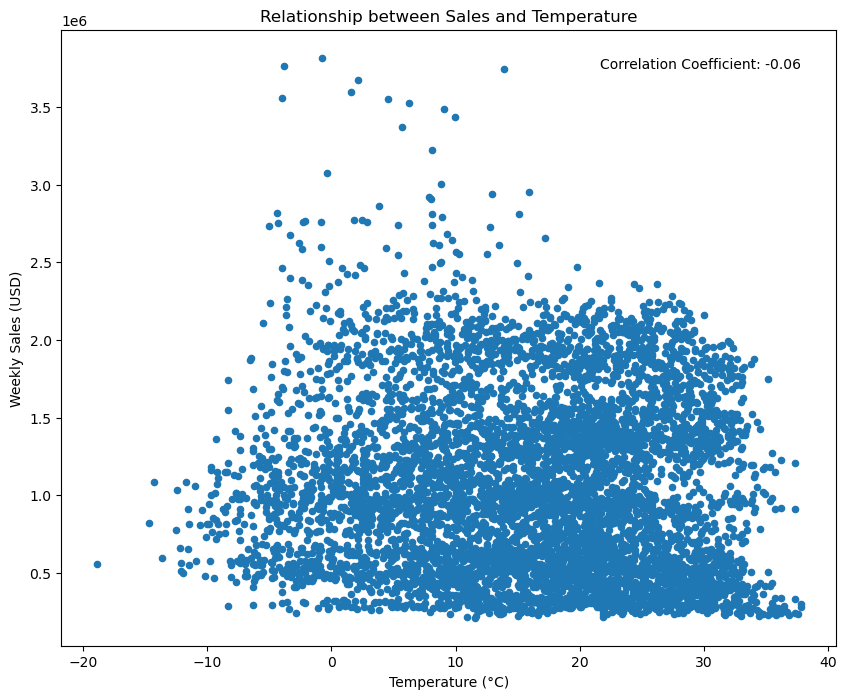

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
data = pd.read_csv('../data/raw/Walmart.csv')

# Convert temperature from Fahrenheit to Celsius
data['Temperature'] = (data['Temperature'] - 32) * 5/9

# Round Weekly_Sales to 100 digits
data['Weekly_Sales'] = data['Weekly_Sales'].round(100)

# Create a scatter plot
data.plot(x='Temperature', y='Weekly_Sales', kind='scatter', figsize=(10, 8))

# Add title and axis labels
plt.title(' Relationship between Sales and Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Weekly Sales (USD)')

# Calculate correlation coefficient
corr = data['Temperature'].corr(data['Weekly_Sales'])

# Add correlation coefficient to plot
plt.text(data['Temperature'].max(), data['Weekly_Sales'].max(),
         'Correlation Coefficient: {:.2f}'.format(corr),
         horizontalalignment='right', verticalalignment='top')

# Show the plot
plt.show()



**Consideration:** looking at this graph, the correlation coefficient (-0.06) we also can say that the correlation between sales revenue and temperature is negative and quite low.

### Graph 6 ###

In [92]:
# Group the data by temperature and calculate the mean weekly sales for each temperature
sales_by_temp = data.groupby('Temperature')['Weekly_Sales'].mean()

# Sort the data in descending order based on mean weekly sales
sales_by_temp = sales_by_temp.sort_values(ascending=False)

# Print the ranking
print('Weekly sales ranking by temperature:')
print(sales_by_temp)


Weekly sales ranking by temperature:
Temperature
-3.794444     3766687.43
 2.177778     3676388.98
 6.227778     3526713.39
-4.405556     2819193.17
 8.933333     2789469.45
                 ...    
 35.155556     224806.96
 16.638889     224639.76
 33.027778     224294.39
 34.444444     224031.19
 11.616667     219804.85
Name: Weekly_Sales, Length: 3528, dtype: float64


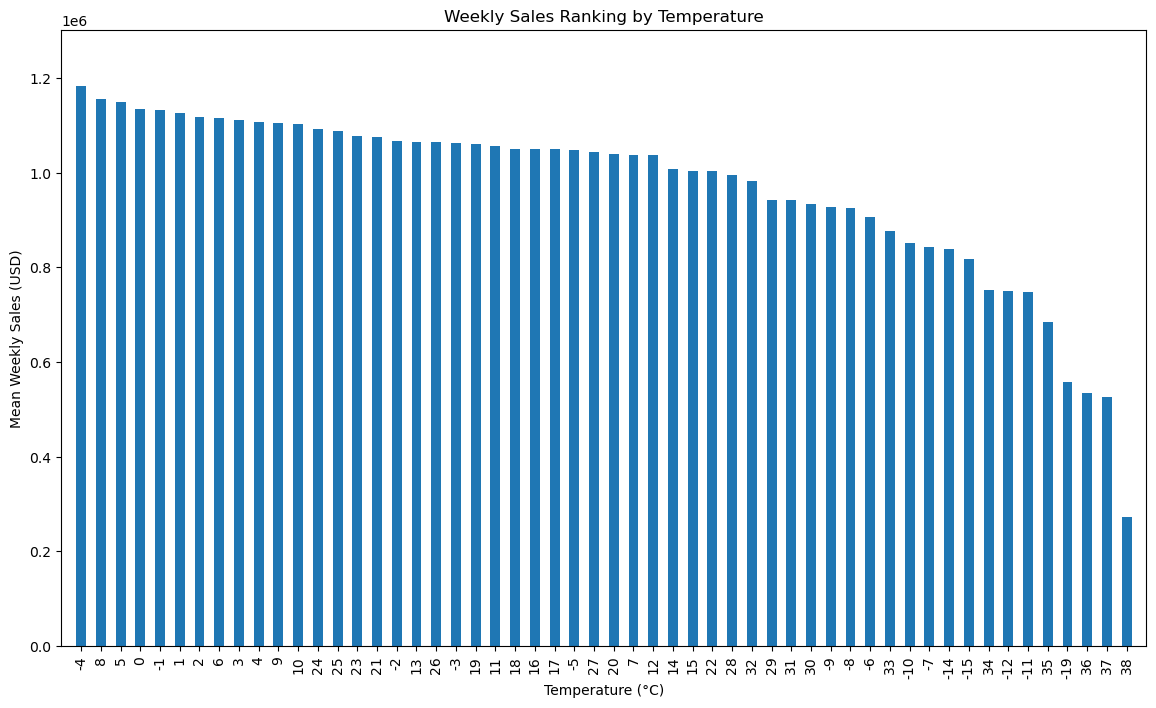

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Round the temperature values to integers
data['Temperature'] = data['Temperature'].round().astype(int)

# Group the data by temperature and calculate the mean weekly sales for each temperature
sales_by_temp = data.groupby('Temperature')['Weekly_Sales'].mean()

# Sort the data in descending order based on mean weekly sales
sales_by_temp = sales_by_temp.sort_values(ascending=False)

# Create a bar plot of the sales by temperature
ax = sales_by_temp.plot(kind='bar', figsize=(14, 8))  # increase the width

# Set x-axis and y-axis labels
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Mean Weekly Sales (USD)')

# Add a title
ax.set_title('Weekly Sales Ranking by Temperature')

# Set the x-axis limits
ax.set_xlim(-1, len(sales_by_temp))

# Set the y-axis limits
ax.set_ylim(0, sales_by_temp.max() * 1.1)

# Show the plot
plt.show()



**Note:** Extremely high (higher than 35) or low (lower than 10) temperatures certainly decrease weekly sales. Overall, temperature did not affect weekly sales too much because the groceries at Walmart are necessary to live, however, people are less likely to go to the Walmart in extreme weather conditions. 


### Data Analysis Pipeline

Here are some common steps of an analysis pipeline (the order isn't set, and not all elements are necessary):

1. Load Data
    - Import the raw data from Kaggle
    - Check file types and encoding to make sure the data type
    - Check delimiters (space, comma, tab).
    - Skip rows and columns 
2. Clean Data
    - Remove columns that are not relevant to my research questions. In my cases, I removed ‘Holiday_Flag’ and ‘Unemployement’.
    - Deal with "incorrect" data and missing data. 
    - Convert the "Revised_date" column to datetime format
3. Process Data
    - Create any new columns needed that are combinations or aggregates of other columns: 
    - Calculate the average weekly sales for each temperature and inflation level
    - Sort the data frame by “Revised _date” column
4. Wrangle Data
    - Group the data by temperature and inflation to identify the relationship between those data and sales.
    - Convert the temperatures to Celsius and round to the nearest degree

    
5. Exploratory Data Analysis (not required for this Task).
6. Data Analysis (not required for this Task).
7. Export reports/data analyses and visualizations (not required for this Task).

## Task 2. Method Chaining and Writing Python programs"

Step 1: Build and Test my method chain

In [ ]:
import math

grouped_data = (pd.read_csv('../data/raw/Walmart.csv')
                .rename(columns={'CPI': 'inflation'})
                .assign(avg_sales=lambda x: x.groupby(['inflation', 'Temperature'])['Weekly_Sales'].transform('mean'))
                .assign(Temperature_C=lambda x: round((x['Temperature'] - 32) * 5/9))
                .assign(avg_sales_ceil=lambda x: x['avg_sales'].apply(lambda y: math.ceil(y)))
                .groupby(['Temperature_C', 'inflation'])
                .agg({'avg_sales_ceil': 'mean'})
                .reset_index())

grouped_data.head(1000)

,Temperature_C,inflation,avg_sales_ceil
0,-19.0,191.762589,558028.0
1,-15.0,133.105968,817486.0
2,-14.0,127.191774,1083072.0
3,-14.0,196.733052,593876.0
4,-12.0,127.719581,816604.0
...,...,...,...
995,7.0,136.475129,1480290.0
996,7.0,136.501774,974908.0
997,7.0,136.503067,633241.0
998,7.0,136.689571,1564503.0


Step 2: Wrap my method chain in a function

In [ ]:
import pandas as pd
import math

# Rename the colums
# Calculate the average weekly sales for each temperature and inflation level
# Convert the temperatures to Celsius and round to the nearst degres
# Claculate the ceiling of the average weekly sales
# Group the data by temperature and inflation and calculate the average ceiling of the weekly sales

def process_data(file_path):
    grouped_data = (
        pd.read_csv(file_path)
          .rename(columns={'CPI': 'inflation'})
          .assign(avg_sales=lambda x: x.groupby(['inflation', 'Temperature'])['Weekly_Sales'].transform('mean'))
          .assign(Temperature_C=lambda x: round((x['Temperature'] - 32) * 5/9))
          .assign(avg_sales_ceil=lambda x: x['avg_sales'].apply(lambda y: math.ceil(y)))
          .groupby(['Temperature_C', 'inflation'])
          .agg({'avg_sales_ceil': 'mean'})
          .reset_index()
    )
    return grouped_data

# file_path = '../data/raw/Walmart.csv'
# grouped_data = process_data(file_path)



Step 3: Move my function into a new .py file 

In [ ]:
from project_functions import load_and_process

file_path = '../data/raw/Walmart.csv'
fhdf = load_and_process(file_path)
print(fhdf)


## Task 3: Conduct the analysis to help answer your research question(s)

**My revised questions: To what extent does inflation and temperature affect consumer behavior?**

Based on my analysis of the six graphs, it appears that both inflation and temperature have a marginal impact on consumer behavior. Specifically, Graph 1 shows a negative correlation of -0.073 between sales revenue and CPI, indicating that as inflation increases, sales revenue may slightly decrease due to the higher prices associated with inflation. This implies that consumers may alter their purchasing behavior in response to inflation. Similarly, Graph 5 displays a negative correlation of -0.06 between sales revenue and temperature, indicating that consumers may be influenced by temperature as well.

It is important to note, however, that these correlations are relatively low, suggesting that Walmart's goods and services are essential for their customers. Graph 3 supports this by showing that despite the increase in average monthly CPI, weekly sales have remained relatively stable. This implies that customers view Walmart's products as necessities and are willing to continue purchasing them despite external economic factors such as inflation.

Graph 6 provides additional insight into the impact of temperature on consumer behavior, indicating that extreme temperatures may decrease weekly sales. This could be due to the fact that customers are less likely to visit the store in such conditions. Overall, while inflation and temperature do have some influence on consumer behavior, the relatively low correlations suggest that Walmart's goods and services are essential for their customers, and external factors do not significantly alter their consumer behavior.